In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

(193, 6, 6)
(193,)


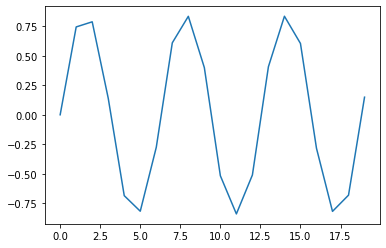

In [7]:
N = 200
#data = np.array([np.sin(x/20) for x in range(N)]) + 0.1*np.random.randn(N)
#data =  5*np.random.randn(N) + np.array([np.exp(x/20) for x in range(N)]) + np.array([np.exp(-x/20) for x in range(N)])
#data = np.array([ 2*np.sin(x)-np.sin(2*x) + 2/3*np.sin(3*x) - 1/2*np.sin(4*x) for x in range(N)]) + 2*np.random.randn(N)
#data1 = np.array([ np.sin(x ) for x in range(N)]) 
data = np.array([ np.sin( np.sin(x )) for x in range(N)]) 
plt.plot(data[:20])


off = 3 # отсчетов до точки предсказания 
length = off*2+1 # всего отсчетов
# формирование обучающей выборки
X = np.array([ np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N-length)]) # i:i+off - 3 отсчета до , i+off+1:i+length - 3 отсчета после
Y = data[off:N-off-1] # off:N-off-1 все элементы, начиная с прогнозируемого
print(X.shape, Y.shape, sep='\n')


In [130]:
model = Sequential()
model.add(Input((length-1, length-1)))
model.add( Bidirectional(GRU(2)) )
model.add(Dense(1, activation='linear')) # линейная, т.к это задача регрессии
model.summary() # выходной нейрон - один, т.к будем получать один прогноз

model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_16 (Bidirecti  (None, 4)                120       
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [128]:
history = model.fit(X, Y, batch_size=32, epochs=50)

Epoch 1/50
7/7 [==============================] - 4s 4ms/step - loss: 6.0948
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 5.9461
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 5.9143
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 5.9016
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 5.8752
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 5.8386
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 5.7889
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 5.6773
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 5.5207
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 5.4332
Epoch 11/50
7/7 [==============================] - 0s 4ms/step - loss: 5.3739
Epoch 12/50
7/7 [==============================] - 0s 4ms/step - loss: 5.3099
Epoch 13/50
7/7 [==============================] - 0s 4ms/step - loss: 5.

[-0.09072662  0.24939764 -2.79142621  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

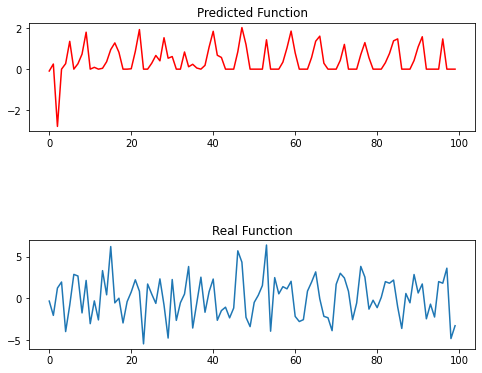

In [129]:
# строим прогноз
M = 100 # 400 прогнозов
XX = np.zeros(M)
XX[:off] = data[len(data)-3:len(data)] # копируем первые 3 элемента из коллекции data 
#A = [1,2,3,4,5,6]
print(XX)


for i in range(M-off-1):
    # формируем входные данные для нейронной сети
    x = np.diag( np.hstack( (XX[i:i+off], data[i+off+1:i+length])) )
    #print(i, x.shape)
    x = np.expand_dims(x, axis=0) # добавляем нулевую ось, чтобы была нужная размерность для входа в сеть
    y = model.predict(x) # вычисленное значение Y вводим в XX 
    XX[i+off] = y
    
   

fig = plt.figure(figsize=(8, 6))    

ax1 = plt.subplot(2, 1, 1)
ax1.title.set_text('Predicted Function')
plt.plot(XX[:M], color = 'r')

ax2 = plt.subplot(2, 1, 2)
ax2.title.set_text('Real Function')
plt.plot(data[:M])

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

